<a href="https://colab.research.google.com/github/Riasat38/CSE440-Natural-Language-Processing-/blob/main/CSE440_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install keras

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize


In [32]:
data = {
    'X': [1.0, 2.0, 3.0, 4.0, 5.0],
    'Y': [9.9, 8.0, 6.1, 3.9, 2.0]
}
df = pd.DataFrame(data)
print(df.head())

     X    Y
0  1.0  9.9
1  2.0  8.0
2  3.0  6.1
3  4.0  3.9
4  5.0  2.0


$$ax^2 + bx + c$$

In [33]:
def gradient_descent_poly(a_val, b_val, c_val, X, Y, learning_rate, epochs):

    # Define x and y as mathematical symbols
    vars = sp.symbols('a b c x y n')
    a, b, c, x, y, n  = vars
    n_val = float(len(X))

    error_function = ((1/(2*n)) * ((y - (a*(x**2) + b*x+c))**2))

    for j in range(epochs):
        c_gradient = 0
        b_gradient = 0
        a_gradient = 0
        for i in range(0, len(X)):
            #print(b)
            c_gradient += sp.diff(error_function, c).subs({x:X[i], y: Y[i], b:b_val, a: a_val, c:c_val, n:n_val})
            b_gradient += sp.diff(error_function, b).subs({x:X[i], y: Y[i], b:b_val, a: a_val, c:c_val, n:n_val})
            a_gradient += sp.diff(error_function, a).subs({x:X[i], y: Y[i], b:b_val, a: a_val, c:c_val, n:n_val})

        c_val -= (learning_rate * c_gradient)
        b_val -= (learning_rate * b_gradient)
        a_val -= (learning_rate * a_gradient)

    return [a_val, b_val, c_val]

In [34]:
X_data = df['X'].values
Y_data = df['Y'].values

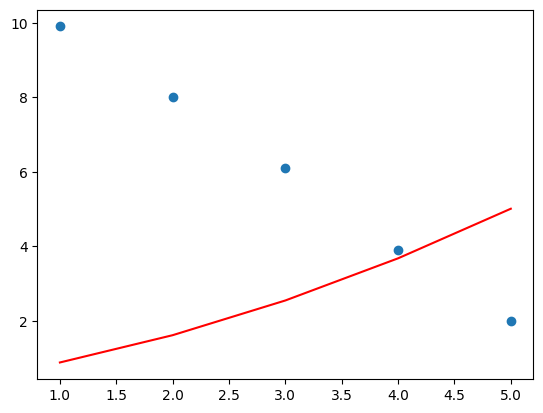

In [35]:
vals = gradient_descent_poly(a_val = 0, b_val = 0, c_val = 0, X = X_data, Y = Y_data, learning_rate=0.0001, epochs = 1000)

a_val = vals[0]
b_val = vals[1]
c_val = vals[2]

predictions = [(a_val * (X_data[i]**2)) + (b_val * X_data[i]) + c_val for i in range(len(X_data))]
plt.scatter(X_data, Y_data)
plt.plot(X_data, predictions, color='r')

## Task 2

In [36]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)
dataset

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [37]:
X = dataset.data
y = dataset.target

In [38]:
print(X['MedInc'].isnull().sum())
print(X['HouseAge'].isnull().sum())
print(X['AveRooms'].isnull().sum())
print(X['AveBedrms'].isnull().sum())
print(X['Population'].isnull().sum())
print(X['AveOccup'].isnull().sum())

0
0
0
0
0
0


In [39]:

X_normalized = normalize(X, axis=0)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [40]:

model = Sequential()
model.add(Dense(31, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=250,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0014 - loss: 3.3550 - val_accuracy: 0.0022 - val_loss: 1.2974
Epoch 2/250
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0027 - loss: 1.3332 - val_accuracy: 0.0022 - val_loss: 1.2775
Epoch 3/250
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0032 - loss: 1.2983 - val_accuracy: 0.0022 - val_loss: 1.2481
Epoch 4/250
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0037 - loss: 1.2720 - val_accuracy: 0.0022 - val_loss: 1.2082
Epoch 5/250
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0037 - loss: 1.2195 - val_accuracy: 0.0022 - val_loss: 1.1610
Epoch 6/250
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0032 - loss: 1.1671 - val_accuracy: 0.0022 - val_loss: 1.0974
Epoch 7/250
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0039 - loss: 1.0961 - val_accuracy: 0.0022 - val_loss: 1.0297
Epoch 8/250
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0029 - loss: 1.0175 - val_accuracy: 0.0022

Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 31)             │           279 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 935 (3.66 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 624 (2.44 KB)


Test MSE: 0.4894, Test accuracy: 0.0022%


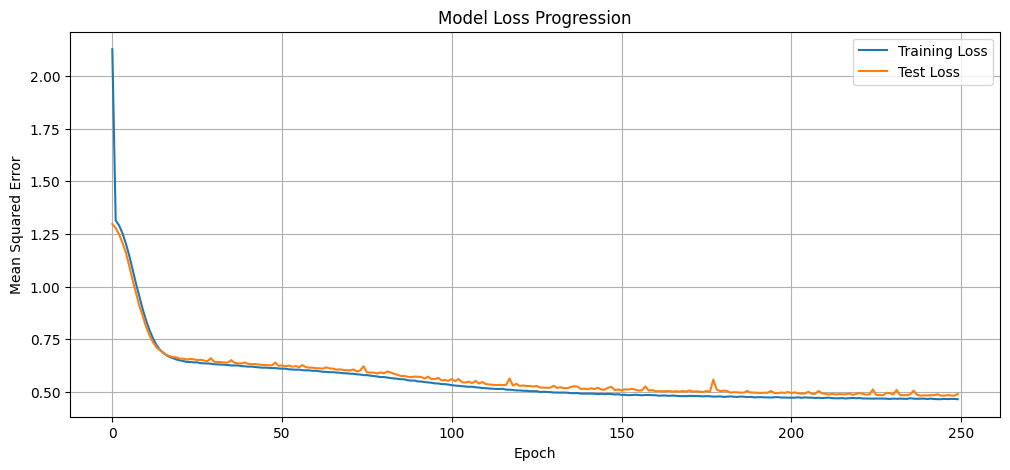

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Summary:")
model.summary()
print(f"\nTest MSE: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}%")


plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss Progression')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [42]:

model_2 = Sequential()

# Hidden layer1
model_2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(Dropout(0.2))

# Hidden layer2
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.2))

# Hidden layer3
model_2.add(Dense(16, activation='relu'))

model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history_2= model_2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    verbose=1
)



Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0030 - loss: 2.4355 - val_accuracy: 0.0022 - val_loss: 1.2635
Epoch 2/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0031 - loss: 1.3237 - val_accuracy: 0.0022 - val_loss: 0.9940
Epoch 3/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0032 - loss: 0.9036 - val_accuracy: 0.0022 - val_loss: 0.6504
Epoch 4/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0029 - loss: 0.6988 - val_accuracy: 0.0022 - val_loss: 0.6418
Epoch 5/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0032 - loss: 0.6883 - val_accuracy: 0.0022 - val_loss: 0.6433
Epoch 6/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0034 - loss: 0.6478 - val_accuracy: 0.0022 - val_loss: 0.6037
Epoch 7/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0030 - loss: 0.6528 - val_accuracy: 0.0022 - val_loss: 0.6037
Epoch 8/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0032 - loss: 0.6523 - val_accuracy: 0.0022

In [43]:
print(history.history)

{'accuracy': [0.0026647287886589766, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0032097867224365473, 0.0031492249108850956, 0.0032097867224365473, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.0031492249108850956, 0.003149224910885095

129/129 - 0s - 2ms/step - accuracy: 0.0022 - loss: 0.4474

Test MSE: 0.4474, Test accuracy: 0.0022

Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

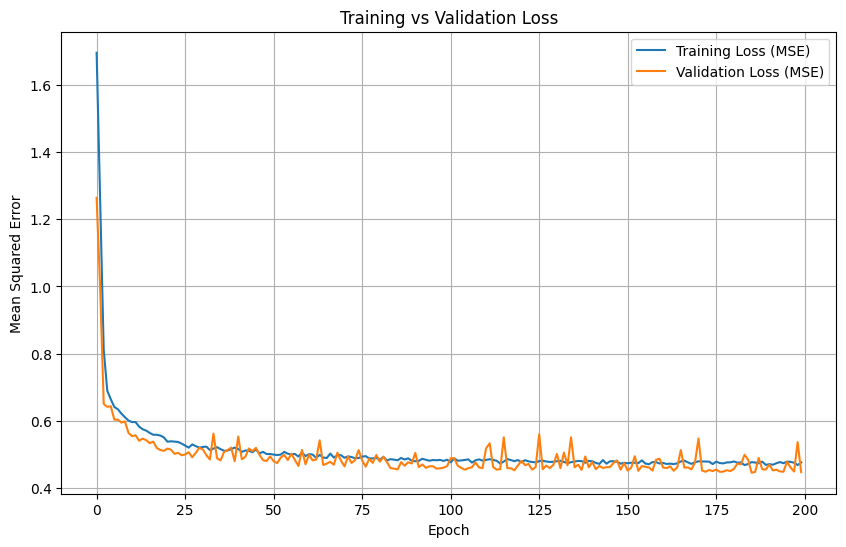

In [44]:
# Evaluate on test set
test_loss, accuracy = model_2.evaluate(X_test, y_test, verbose=2)
print(f"\nTest MSE: {test_loss:.4f}, Test accuracy: {accuracy:.4f}")

# Model summary
print("\nModel Summary:")
model_2.summary()

plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Training Loss (MSE)')
plt.plot(history_2.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

#Task 4


In [45]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

In [46]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [47]:
X_iris = iris['data']
y_iris = iris['target']


In [48]:
print(X_iris['sepal length (cm)'].isnull().sum())
print(X_iris['sepal width (cm)'].isnull().sum())
print(X_iris['petal length (cm)'].isnull().sum())
print(X_iris['petal width (cm)'].isnull().sum())

0
0
0
0


In [49]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, train_size= 0.8, random_state=42)

In [50]:
model_4 = Sequential()

#hidden layer 1
model_4.add(Dense(64, activation='relu', input_shape=(X_train_iris.shape[1],)))
model_4.add(Dropout(0.2))

#hidden layer 2
model_4.add(Dense(32, activation='relu'))
model_4.add(Dropout(0.2))

#hidden layer 3
model_4.add(Dense(16, activation='relu'))

model_4.add(Dense(1, activation='softmax'))

model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_4= model_4.fit(
    X_train_iris, y_train_iris,
    validation_data=(X_test_iris, y_test_iris),
    epochs=200,
    verbose=1
)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.3106 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 2/200


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3606 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3565 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3262 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3450 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3356 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3773 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3200 - loss: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 0.0000e+00
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2971 - los

In [51]:
print(history_4.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


1/1 - 0s - 44ms/step - accuracy: 0.3000 - loss: 0.0000e+00

Test Categorical Entropy-Loss: 0.0000, Test accuracy: 0.3000

Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

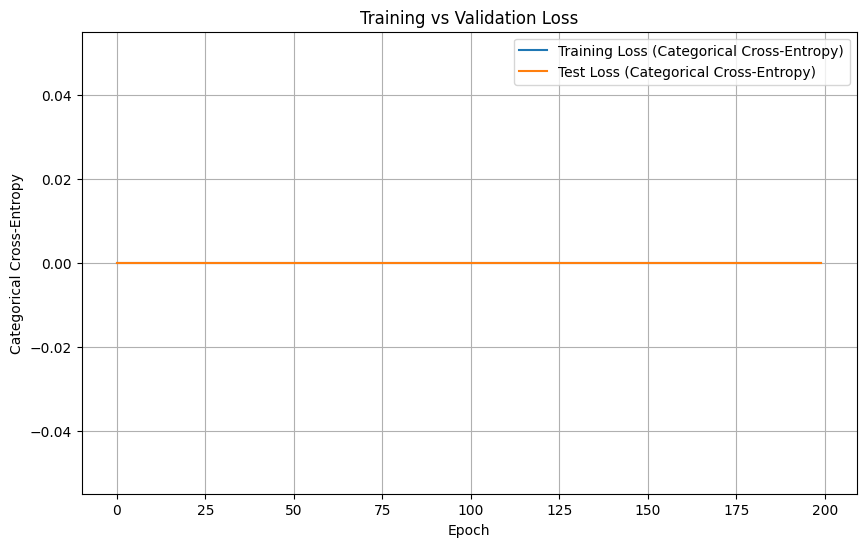

In [53]:
test_loss, acc = model_4.evaluate(X_test_iris, y_test_iris, verbose=2)
print(f"\nTest Categorical Entropy-Loss: {test_loss:.4f}, Test accuracy: {acc:.4f}")

# Model summary
print("\nModel Summary:")
model_4.summary()

plt.figure(figsize=(10, 6))
plt.plot(history_4.history['loss'], label='Training Loss (Categorical Cross-Entropy)')
plt.plot(history_4.history['val_loss'], label='Test Loss (Categorical Cross-Entropy)')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.legend()
plt.grid(True)
plt.show()